In [408]:
# what's a raymarshing

In [439]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.rcParams["figure.figsize"] = (6,6)

In [447]:
H = 100
W = 100
Z = 0

class DetectorSquare():
    def __init__(self, h=100, w=120, z=0):
        self.h, self.w = h, w
        self.r = float(self.w) / self.h
        self.x1, self.x2, self.y1, self.y2, self.z1, self.z2 = -1, 1, -1. / self.r + .25, 1. / self.r + .25, z, -z
        self.xes = np.linspace(self.x1, self.x2, self.w)
        self.yes = np.linspace(self.y1, self.y2, self.h)
        
class Ray():
    def __init__(self, location, vector, pixel):
        self.range = 0
        self.active = True
        self.energy = 0
        self.location = np.array(location)
        self.vector = np.array(vector)
        self.pixel = pixel

In [448]:
rays = []
origin = np.array([0, 0, 5])
detector = DetectorSquare(H,W,-5)
for i in range(W):
    for j in range(H):
        rays.append(Ray(location = [detector.xes[i],detector.yes[j],detector.z1],
                         vector = [detector.xes[i],detector.yes[j],detector.z1] - origin,
                         pixel = [i,j]))

In [454]:
length = lambda x: math.sqrt((x**2).sum())

def sphereSDF(p):  return length(p) - 3.1

def displance_point_along_vector(p0,vector,d):
    return p0 + vector/np.linalg.norm(vector)*d

In [455]:
while all([ray.active for ray in rays]):
    for q, ray in enumerate([x for x in rays if x.active]):
        save_displace = sphereSDF(ray.location)
        if (save_displace > 100): ray.active = False
        if save_displace < 0.001: 
            ray.energy = 1
            ray.active = False
        ray.location = displance_point_along_vector(ray.location, ray.vector, -save_displace)
        

In [456]:
energy_map = np.zeros((W,H))

In [457]:
for ray in rays:
    energy_map[ray.pixel[0],ray.pixel[1]]= ray.energy

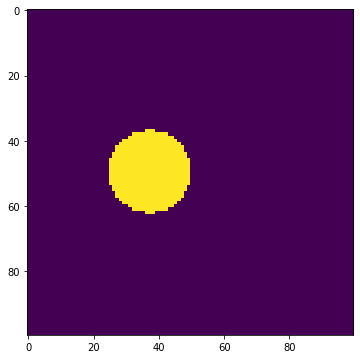

In [458]:
plt.imshow(energy_map)
plt.show()